# Module 10: Sentiment Analysis of Moby Dick and Persuasion

* DS 5001
* Christian Schroeder (dbn5eu)

# Set Up

In [70]:
novels_csv = 'TOKEN2.xls'
OHCO = ['author', 'book_id', 'chap_num', 'para_num', 'sent_num'] # We exclude genre
CHAPS = OHCO[2:3]
PARAS = OHCO[2:4]
SENTS = OHCO[2:5]

salex_csv = 'salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

## Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

In [3]:
sns.set()
%matplotlib inline

## Get Lexicon

In [4]:

nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]
salex['polarity'] = salex.positive - salex.negative

emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [5]:
salex['polarity'] = salex.positive - salex.negative

## Get lexicon columns

In [6]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [7]:
emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'polarity']

# Get Novels

In [8]:
TOKENS = pd.read_csv(novels_csv)
LIB = pd.read_csv("LIB.xls")

In [9]:
TOKENS = TOKENS.merge(LIB[['book_id','author','title']], on='book_id', how='left')

In [10]:
TOKENS = TOKENS.set_index(OHCO).sort_index()

In [11]:
TOKENS.head(5)

token_num            pos_tuple  \
author book_id chap_num para_num sent_num                                   
austen 105     1        1        0                 0       ('Sir', 'NNP')   
                                 0                 1    ('Walter', 'NNP')   
                                 0                 2    ('Elliot', 'NNP')   
                                 0                 4         ('of', 'IN')   
                                 0                 5  ('Kellynch', 'NNP')   

                                           pos token_str  term_str  term_id  \
author book_id chap_num para_num sent_num                                     
austen 105     1        1        0         NNP       Sir       sir    31573   
                                 0         NNP    Walter    walter    38510   
                                 0         NNP    Elliot    elliot    11468   
                                 0          IN        of        of    23891   
                                 0         NNP  Kellynch  kellynch    19515   

                                                title  
author book_id chap_num para_num sent_num              
austen 105     1        1        0         Persuasion  
                                 0         Persuasion  
                                 0         Persuasion  
                                 0         Persuasion  
                                 0         Persuasion

In [12]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [13]:
TOKENS[salex.columns].sample(10)

anger  anticipation  disgust  \
author   book_id chap_num para_num sent_num                                 
melville 15859   1        62       1           0.0           0.0      0.0   
         2701    102      13       5           0.0           0.0      0.0   
         1900    11       16       2           0.0           0.0      0.0   
austen   158     29       39       1           0.0           0.0      0.0   
melville 34970   106      1        1           0.0           0.0      0.0   
         13721   81       19       8           0.0           0.0      0.0   
         15422   4        45       1           0.0           0.0      0.0   
         34970   23       55       1           0.0           0.0      0.0   
         2701    131      17       0           0.0           0.0      0.0   
austen   141     39       7        2           0.0           0.0      0.0   

                                             fear  joy  negative  positive  \
author   book_id chap_num para_num sent_num                                  
melville 15859   1        62       1          0.0  0.0       NaN       NaN   
         2701    102      13       5          0.0  0.0       NaN       NaN   
         1900    11       16       2          0.0  0.0       NaN       NaN   
austen   158     29       39       1          0.0  0.0       NaN       NaN   
melville 34970   106      1        1          0.0  0.0       NaN       NaN   
         13721   81       19       8          0.0  0.0       NaN       NaN   
         15422   4        45       1          0.0  0.0       NaN       NaN   
         34970   23       55       1          0.0  0.0       NaN       NaN   
         2701    131      17       0          0.0  0.0       NaN       NaN   
austen   141     39       7        2          0.0  0.0       NaN       NaN   

                                             sadness  surprise  trust  \
author   book_id chap_num para_num sent_num                             
melville 15859   1        62       1             0.0       0.0    0.0   
         2701    102      13       5             0.0       0.0    0.0   
         1900    11       16       2             0.0       0.0    0.0   
austen   158     29       39       1             0.0       0.0    0.0   
melville 34970   106      1        1             0.0       0.0    0.0   
         13721   81       19       8             0.0       0.0    0.0   
         15422   4        45       1             0.0       0.0    0.0   
         34970   23       55       1             0.0       0.0    0.0   
         2701    131      17       0             0.0       0.0    0.0   
austen   141     39       7        2             0.0       0.0    0.0   

                                             polarity  
author   book_id chap_num para_num sent_num            
melville 15859   1        62       1              0.0  
         2701    102      13       5              0.0  
         1900    11       16       2              0.0  
austen   158     29       39       1              0.0  
melville 34970   106      1        1              0.0  
         13721   81       19       8              0.0  
         15422   4        45       1              0.0  
         34970   23       55       1              0.0  
         2701    131      17       0              0.0  
austen   141     39       7        2              0.0

In [14]:
TOKENS[['term_str'] + emo_cols].sample(10)

term_str  anger  anticipation  \
author   book_id chap_num para_num sent_num                                 
austen   1342    16       3        4              of    0.0           0.0   
melville 1900    20       167      4         heralds    0.0           0.0   
austen   158     43       35       1           piece    0.0           0.0   
melville 21816   15       3        1             was    0.0           0.0   
         10712   16       10       3               a    0.0           0.0   
austen   161     31       38       1          defend    0.0           0.0   
                 25       4        1             the    0.0           0.0   
         1342    13       30       2             say    0.0           0.0   
         121     16       1        4             was    0.0           0.0   
melville 2701    7        5        0            tall    0.0           0.0   

                                             disgust  fear  joy  sadness  \
author   book_id chap_num para_num sent_num                                
austen   1342    16       3        4             0.0   0.0  0.0      0.0   
melville 1900    20       167      4             0.0   0.0  0.0      0.0   
austen   158     43       35       1             0.0   0.0  0.0      0.0   
melville 21816   15       3        1             0.0   0.0  0.0      0.0   
         10712   16       10       3             0.0   0.0  0.0      0.0   
austen   161     31       38       1             0.0   1.0  0.0      0.0   
                 25       4        1             0.0   0.0  0.0      0.0   
         1342    13       30       2             0.0   0.0  0.0      0.0   
         121     16       1        4             0.0   0.0  0.0      0.0   
melville 2701    7        5        0             0.0   0.0  0.0      0.0   

                                             surprise  trust  polarity  
author   book_id chap_num para_num sent_num                             
austen   1342    16       3        4              0.0    0.0       0.0  
melville 1900    20       167      4              0.0    0.0       0.0  
austen   158     43       35       1              0.0    0.0       0.0  
melville 21816   15       3        1              0.0    0.0       0.0  
         10712   16       10       3              0.0    0.0       0.0  
austen   161     31       38       1              0.0    0.0       1.0  
                 25       4        1              0.0    0.0       0.0  
         1342    13       30       2              0.0    0.0       0.0  
         121     16       1        4              0.0    0.0       0.0  
melville 2701    7        5        0              0.0    0.0       0.0

In [15]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [16]:
TOKENS.head()

token_num            pos_tuple  \
author book_id chap_num para_num sent_num                                   
austen 105     1        1        0                 0       ('Sir', 'NNP')   
                                 0                 1    ('Walter', 'NNP')   
                                 0                 2    ('Elliot', 'NNP')   
                                 0                 4         ('of', 'IN')   
                                 0                 5  ('Kellynch', 'NNP')   

                                           pos token_str  term_str  term_id  \
author book_id chap_num para_num sent_num                                     
austen 105     1        1        0         NNP       Sir       sir    31573   
                                 0         NNP    Walter    walter    38510   
                                 0         NNP    Elliot    elliot    11468   
                                 0          IN        of        of    23891   
                                 0         NNP  Kellynch  kellynch    19515   

                                                title  anger  anticipation  \
author book_id chap_num para_num sent_num                                    
austen 105     1        1        0         Persuasion    0.0           0.0   
                                 0         Persuasion    0.0           0.0   
                                 0         Persuasion    0.0           0.0   
                                 0         Persuasion    0.0           0.0   
                                 0         Persuasion    0.0           0.0   

                                           disgust  fear  joy  negative  \
author book_id chap_num para_num sent_num                                 
austen 105     1        1        0             0.0   0.0  0.0       0.0   
                                 0             0.0   0.0  0.0       NaN   
                                 0             0.0   0.0  0.0       NaN   
                                 0             0.0   0.0  0.0       NaN   
                                 0             0.0   0.0  0.0       NaN   

                                           positive  sadness  surprise  trust  \
author book_id chap_num para_num sent_num                                       
austen 105     1        1        0              1.0      0.0       0.0    1.0   
                                 0              NaN      0.0       0.0    0.0   
                                 0              NaN      0.0       0.0    0.0   
                                 0              NaN      0.0       0.0    0.0   
                                 0              NaN      0.0       0.0    0.0   

                                           polarity  
author book_id chap_num para_num sent_num            
austen 105     1        1        0              1.0  
                                 0              0.0  
                                 0              0.0  
                                 0              0.0  
                                 0              0.0

In [41]:
MD = TOKENS.loc[TOKENS.title.str.contains("Moby Dick")]
PS = TOKENS.loc[TOKENS.title.str.contains("Persuasion")]

<AxesSubplot:>

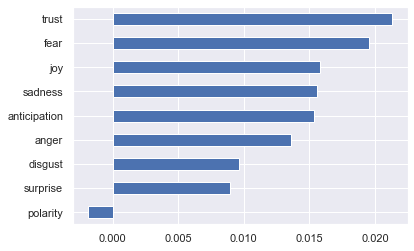

In [43]:
MD[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

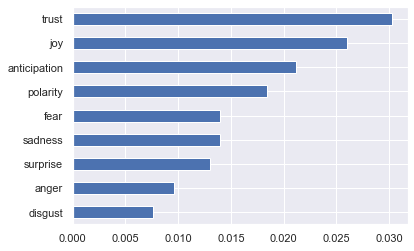

In [44]:
PS[emo_cols].mean().sort_values().plot.barh()

# Sentiment by Chapter

In [45]:
MD_chaps = MD.groupby(CHAPS)[emo_cols].mean()

In [46]:
PS_chaps = PS.groupby(CHAPS)[emo_cols].mean()

In [47]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

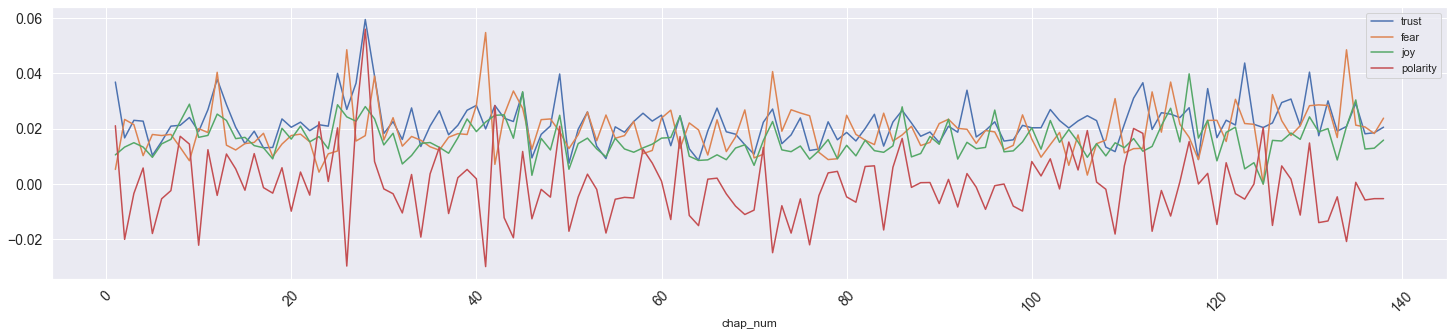

In [48]:
plot_sentiments(MD_chaps, ['trust','fear','joy','polarity'])

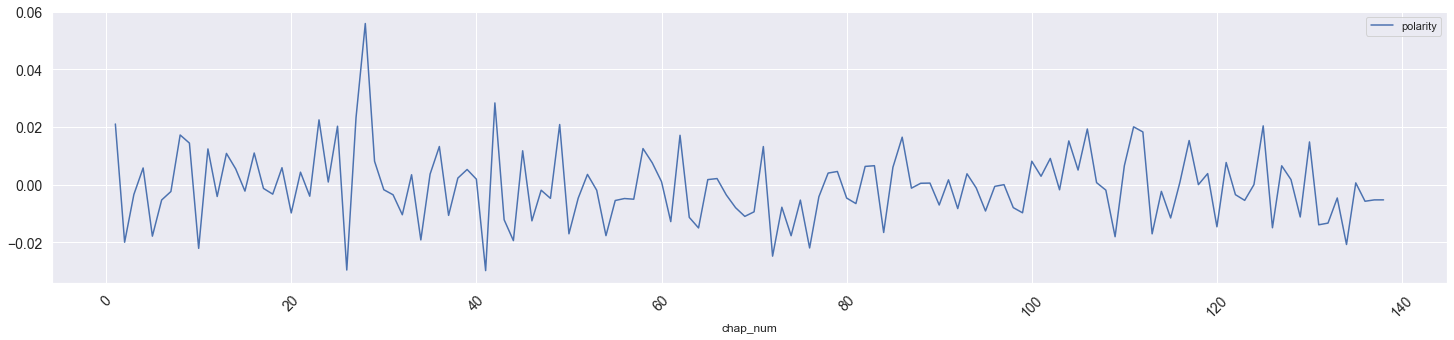

In [49]:
plot_sentiments(MD_chaps, ['polarity'])

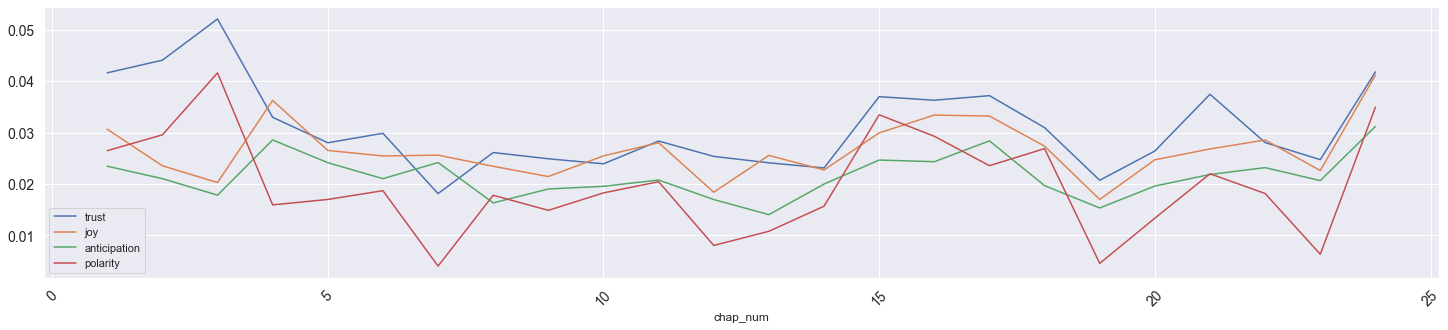

In [50]:
plot_sentiments(PS_chaps, ['trust','joy','anticipation','polarity'])

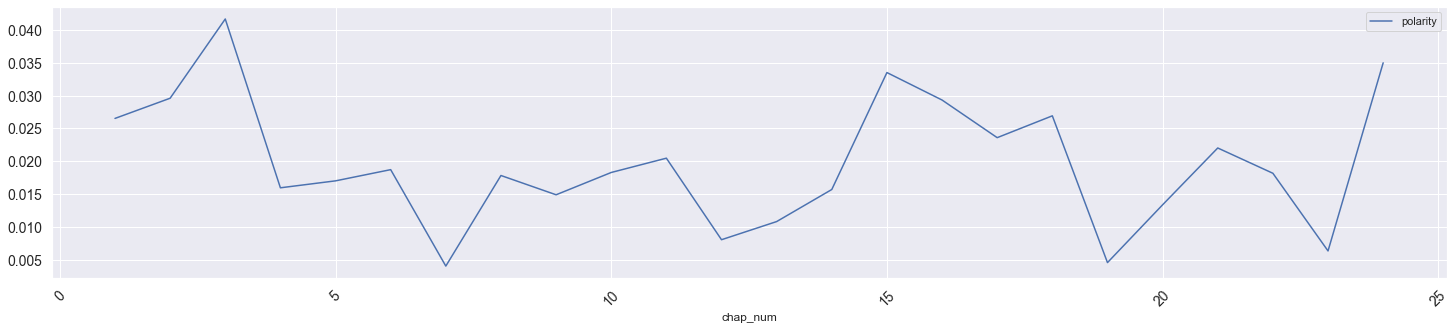

In [51]:
plot_sentiments(PS_chaps, ['polarity'])

# Explore Sentiment in Texts

In [52]:
MD['html'] =  MD.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
PS['html'] =  PS.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)

C:\Users\cschr\AppData\Local\Temp/ipykernel_8900/255793498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MD['html'] =  MD.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
C:\Users\cschr\AppData\Local\Temp/ipykernel_8900/255793498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS['html'] =  PS.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)


In [54]:
MD['html'].sample(10)

author    book_id  chap_num  para_num  sent_num
melville  2701     84        30        8                 <span class='sent0'>of</span>
                   122       18        1                <span class='sent0'>end</span>
                   107       4         2           <span class='sent1'>respects</span>
                   11        5         1                  <span class='sent0'>a</span>
                   133       3         0                 <span class='sent0'>in</span>
                   59        3         1           <span class='sent0'>anything</span>
                   40        3         7                  <span class='sent0'>I</span>
                   136       8         3                  <span class='sent0'>A</span>
                   115       5         3                <span class='sent0'>and</span>
                   85        5         3                  <span class='sent0'>a</span>
Name: html, dtype: object

In [55]:
MD_sents = MD.groupby(SENTS)[emo_cols].mean()
PS_sents = PS.groupby(SENTS)[emo_cols].mean()

In [56]:
MD_sents['sent_str'] = MD.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
MD_sents['html_str'] = MD.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [57]:
PS_sents['sent_str'] = PS.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
PS_sents['html_str'] = PS.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [58]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [61]:
sample_sentences(MD_sents)

Sentiment,ID,Sentence
-0.0536,"(138, 51, 0)",But as the oarsmen violently forced their boat through the sledge hammering seas the before whale smitten bow ends of two planks burst through and in an instant almost the temporarily disabled boat lay nearly level with the waves its half wading splashing crew trying hard to stop the gap and bale out the pouring water
0.0,"(44, 11, 1)",For as the secrets of the currents in the seas have never yet been divulged even to the most erudite research so the hidden ways of the Sperm Whale when beneath the surface remain in great part unaccountable to his pursuers and from time to time have originated the most curious and contradictory speculations regarding them especially concerning the mystic modes whereby after sounding to a great depth he transports himself with such vast swiftness to the most widely distant points
0.0,"(130, 23, 20)",I go below let me not see that thing here when I return again
0.0769,"(111, 2, 6)",This is what an old fellow gets now for working in dead lumber
0.0,"(12, 1, 1)",Starboard gangway there
-0.0606,"(91, 11, 3)",But strike a member of the harem school and her companions swim around her with every token of concern sometimes lingering so near her and so long as themselves to fall a prey
0.0,"(73, 11, 2)",O Nature and O soul of man
-0.0312,"(90, 5, 8)",While other hulls are loaded down with alien stuff to be transferred to foreign wharves the world wandering whale ship carries no cargo but herself and crew their weapons and their wants
-0.0667,"(66, 3, 5)",But this critical act is not always unattended with the saddest and most fatal casualties
-0.0714,"(34, 2, 7)",And there 's a mighty difference between a living thump and a dead thump


In [62]:
sample_sentences(PS_sents)

Sentiment,ID,Sentence
0.0667,"(23, 19, 0)",Captain Harville smiled as much as to say Do you claim that for your sex
0.1579,"(1, 9, 0)",This friend and Sir Walter did not marry whatever might have been anticipated on that head by their acquaintance
0.0,"(7, 16, 5)",and it only harasses me
0.2,"(10, 1, 8)",There was no triumph no pitiful triumph in his manner
0.0909,"(24, 10, 4)",To those however he was very well disposed to attach himself
0.0625,"(21, 89, 4)",I thought it coming on before our acquaintance ceased but it is now a confirmed feeling
0.0,"(18, 5, 0)",Oh
-0.0556,"(22, 20, 2)",The scheme had received its first impulse by Captain Harville 's wanting to come to Bath on business
0.05,"(5, 18, 0)",The last office of the four carriage horses was to draw Sir Walter Miss Elliot and Mrs Clay to Bath
0.0,"(22, 53, 0)",If it depended only on my inclination ma'am the party at home excepting on Mary 's account would not be the smallest impediment


# VADER

In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [65]:
MD_vader_cols = MD_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
MD_vader = pd.concat([MD_sents, MD_vader_cols], axis=1)

In [66]:
MD_vader.head()

anger  anticipation  disgust      fear  \
chap_num para_num sent_num                                              
1        0        0         0.000000           0.0      0.0  0.000000   
         1        0         0.000000           0.0      0.0  0.000000   
                  1         0.000000           0.0      0.0  0.000000   
                  2         0.066667           0.0      0.0  0.066667   
         2        0         0.000000           0.0      0.0  0.000000   

                                 joy   sadness  surprise     trust  polarity  \
chap_num para_num sent_num                                                     
1        0        0         0.000000  0.100000  0.000000  0.100000  0.000000   
         1        0         0.000000  0.000000  0.000000  0.071429  0.071429   
                  1         0.000000  0.000000  0.000000  0.000000  0.000000   
                  2         0.000000  0.066667  0.000000  0.000000 -0.066667   
         2        0         0.041667  0.000000  0.020833  0.062500  0.062500   

                                                                     sent_str  \
chap_num para_num sent_num                                                      
1        0        0         supplied by a late consumptive usher to a gram...   
         1        0         the pale usher threadbare in coat heart body a...   
                  1         he was ever dusting his old lexicons and gramm...   
                  2         he loved to dust his old grammars it somehow m...   
         2        0         while you take in hand to school others and to...   

                                                                     html_str  \
chap_num para_num sent_num                                                      
1        0        0         <span class='sent0'>Supplied</span> <span clas...   
         1        0         <span class='sent0'>The</span> <span class='se...   
                  1         <span class='sent0'>He</span> <span class='sen...   
                  2         <span class='sent0'>He</span> <span class='sen...   
         2        0         <span class='sent0'>While</span> <span class='...   

                              neg    neu    pos  compound  
chap_num para_num sent_num                                 
1        0        0         0.000  1.000  0.000    0.0000  
         1        0         0.000  0.756  0.244    0.6369  
                  1         0.000  1.000  0.000    0.0000  
                  2         0.000  0.782  0.218    0.5994  
         2        0         0.122  0.819  0.060   -0.3268

<AxesSubplot:xlabel='chap_num,para_num,sent_num'>

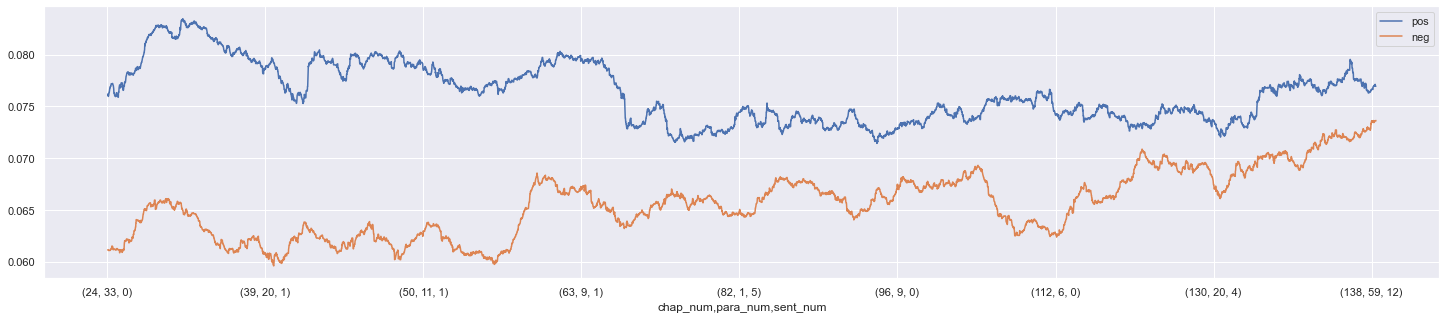

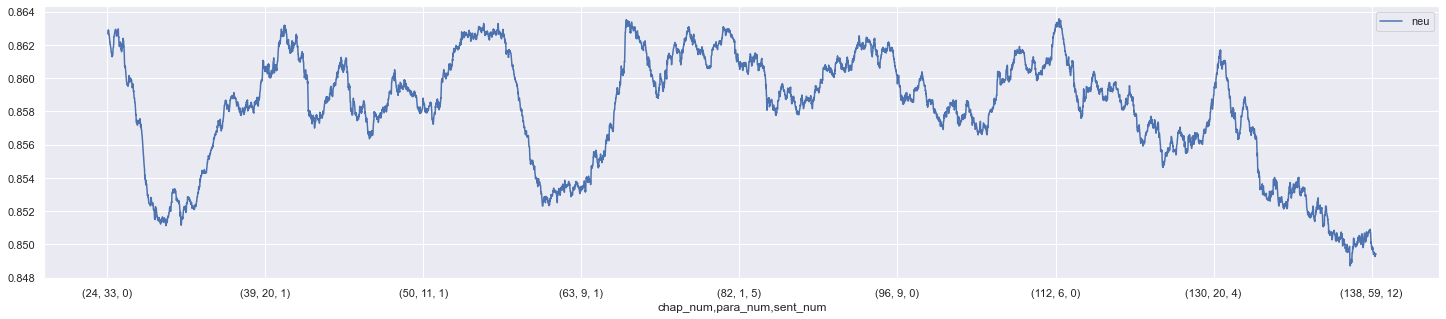

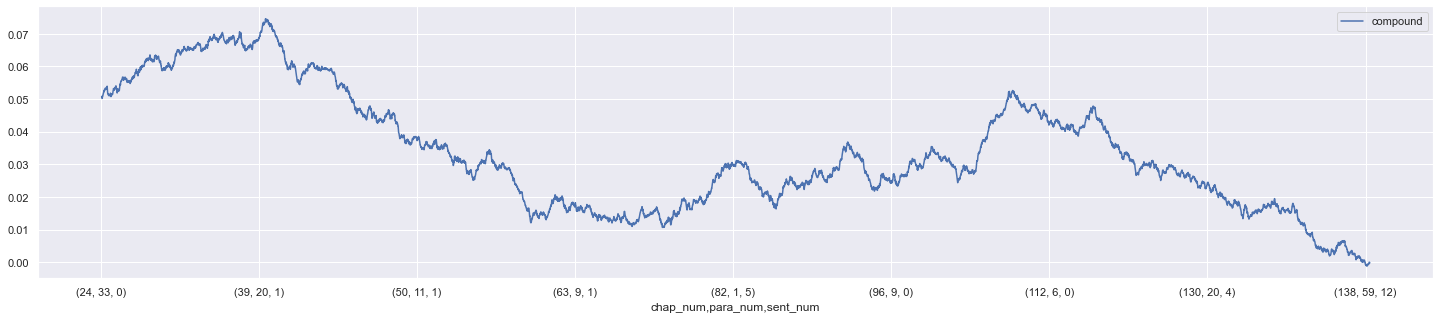

In [67]:
w = int(MD_vader.shape[0] / 5)
MD_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
MD_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
MD_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [68]:
PS_vader_cols = PS_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
PS_vader = pd.concat([PS_sents, PS_vader_cols], axis=1)

<AxesSubplot:xlabel='chap_num,para_num,sent_num'>

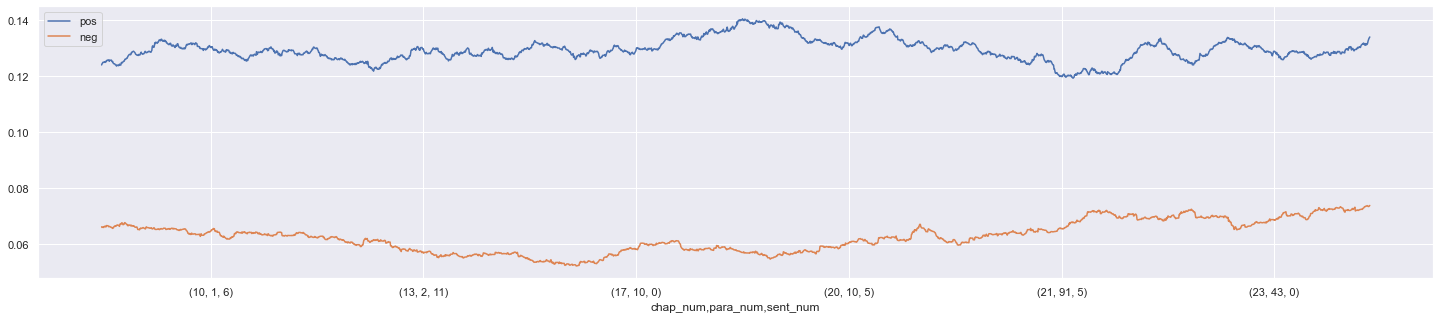

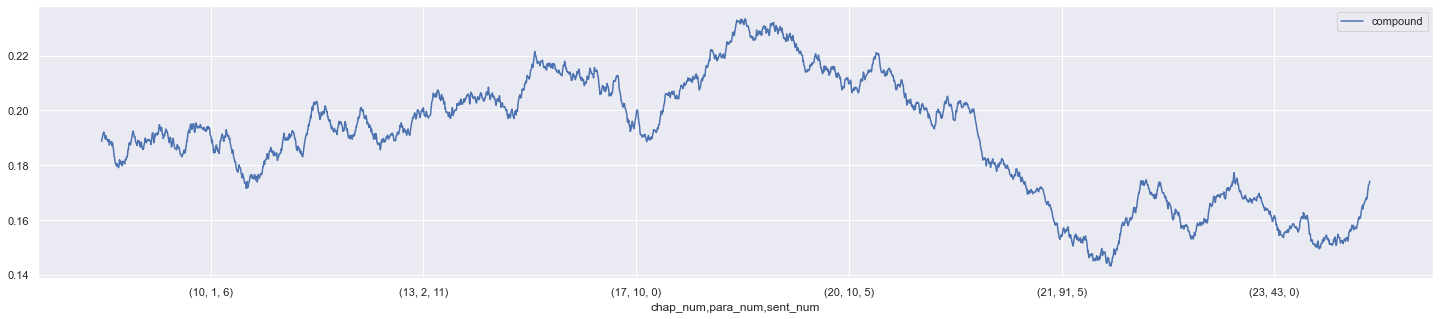

In [69]:
w = int(PS_vader.shape[0] / 5)
PS_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
PS_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))